In [1]:
import numpy as np
import pandas as pd
import json ## dictionary
import re ## regular expression
import glob ## path
from datetime import date, datetime, timedelta ## date time
import time ## for pausing the script

## requests
import requests
from fake_useragent import UserAgent

## selenium
from selenium import webdriver
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains

## beautiful soup
from bs4 import BeautifulSoup

import base64

# Requests

In [2]:
# url = ''

# ua = UserAgent()
# headers = {'User-Agent':str(ua.chrome)}

# response = requests.get(url, headers = headers) ## headers: a dictionary

# print(response.status_code) ## an int, 200 = success
# print(response.text) ## a str, for scrape or for API
# print(response.json()) ## a dict, for API

# Selenium

## With driver

Download from https://chromedriver.chromium.org/downloads, save to chormepath
    
    driver = webdriver.Chrome(chormepath)


## Without driver

Sometimes need to update your chrome to latest version
    driver = uc.Chrome()


### 1. Incognito
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument("--incognito")
 
    driver = webdriver.Chrome(chormepath, options = chrome_options)
    ## or
    driver = uc.Chrome(options = chrome_options)
    
### 2. Open url, get HTML, then close it
    driver.get(url)
    
    driver.maximize_window()
    
    time.sleep(sleep_seconds)
    ## sleep_seconds >= 3
    
    raw_result = driver.page_source ## initial html before javascript
    ## or
    raw_result = driver.execute_script("return document.documentElement.innerHTML;") ## html after on-load javascript, I usually run it anyway
    
    driver.close()
    
## 3. Operate on the page

1. Find XPath of the button / the text box on the page

**right click > inspect > right click html > Copy > Copy full XPath / Copy Xpath**

2. Code


    from selenium.webdriver.common.by import By
    from selenium.webdriver.common.action_chains import ActionChains

    Xpath = 'xxx'
    click_Menu = driver.find_element(by = By.XPATH, value = Xpath)
    
    ## A. left click
    click_Menu.click()
    
    ## B. right click
    action = ActionChains(driver)
    action.move_to_element(click_Menu).perform()
    action.context_click(click_Menu).perform()
    
    ## C. clear text
    click_Menu.clear()
    
    ## D. enter text
    click_Menu.send_keys(operate)
    
    
    time.sleep(sleep_seconds)

In [3]:
## search "starwars", you can try anything after search?q=

sleep_seconds = 3
url = 'https://www.google.com/search?q=starwars'

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--incognito")

In [4]:
## open an incognito window

driver = uc.Chrome(options = chrome_options)
driver.get(url)
driver.maximize_window()
time.sleep(sleep_seconds)

In [5]:
## click accept for the cookie

Xpath_SearchIncog = '//*[@id="L2AGLb"]/div'
click_Menu = driver.find_element(by = By.XPATH, value = Xpath_SearchIncog)
click_Menu.click()
time.sleep(sleep_seconds)

In [6]:
## click Image
Xpath_Image = '//*[@id="bqHHPb"]/div/div/div[1]/a[1]/div/span'
click_Menu = driver.find_element(by = By.XPATH, value = Xpath_Image)
click_Menu.click()
time.sleep(sleep_seconds)

<head><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.GsbA68hXs80.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo899t-H8Lxb3OqzMDuPn6TV_i36ag/cb=gapi.loaded_0" nonce="" async=""></script><base href="https://www.google.com/"><meta name="referrer" content="origin"><script data-id="_gd" nonce="">window.WIZ_global_data = {"ALgnxe":[48585937,72247885,72476704,4991327,72414862,72473867,72450631,72424466,72458795,72373039,1717484,72377807,72323476,48855367,72470891,72453983,72451090,10208620,93804558,72443628,72446645,4791182,72342776,4583312,72412175,48887082,72481351,4629446,72454591,93814384,48661138,72345441,72462234,72402176,72345759,72410956,72349409,72473738,4996886,72270116,93836374,72434419,4920683,72354980,4650101,48887056,72456869,3373084,48681252,72440199,72479935,72440197,72281266,47848583,72456843,72420183,72477109,72448521,93870998,2504469,72383602,72457559,48621871,72470440,93874004,72448564,72448414,72485126,48872564,2504510,72369888,
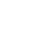
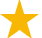
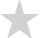
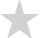
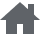
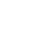
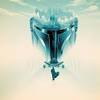
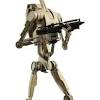
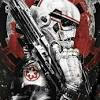
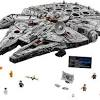
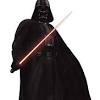
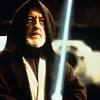
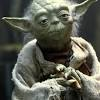
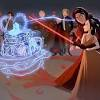
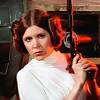
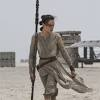
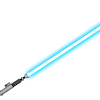
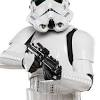
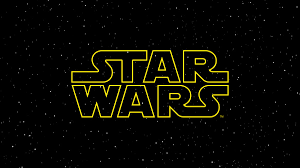
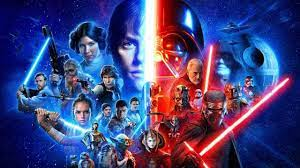
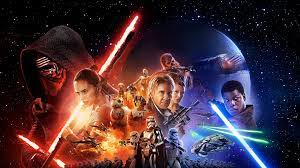
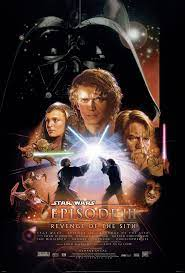
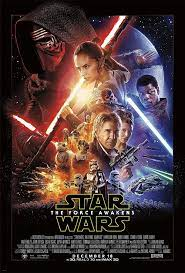
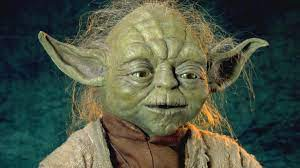
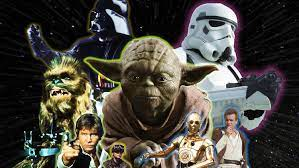
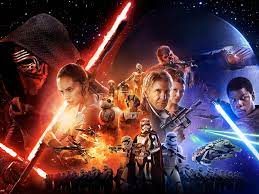
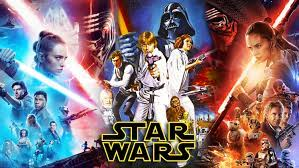
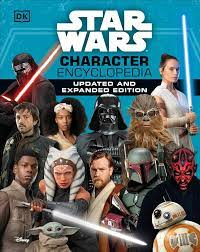
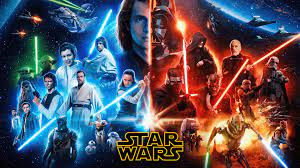
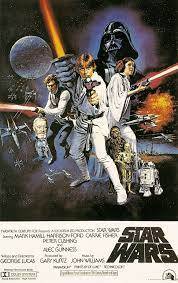
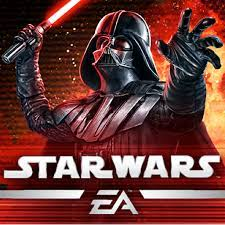
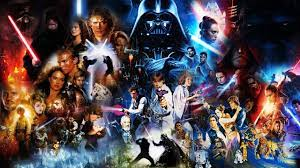
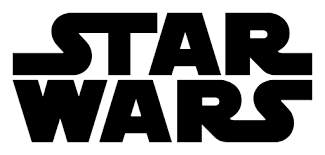
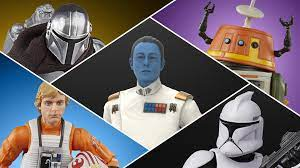
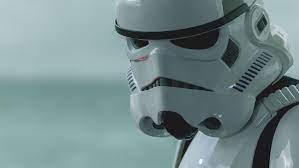
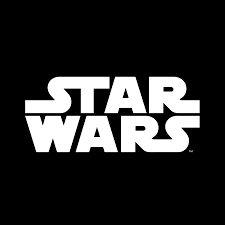
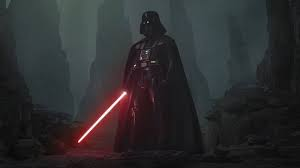
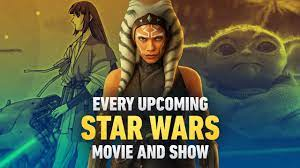

In [7]:
# raw_result_driver = driver.page_source
raw_result_driver = driver.execute_script("return document.documentElement.innerHTML;")
print(raw_result_driver)
# driver.close() ## not necessary, but you are scraping a lot of windows, better to close it after it's done

# Beautiful Soup

## 1. from str to bs4.BeautifulSoup

    pip install bs4
    from bs4 import BeautifulSoup
    
    BS = BeautifulSoup(raw_result)
    
## 2. find all parts of BS matches a tag, into a list

**\<tag\> xxxx \<\tag\>**

    BS_list = BS.findAll(tag)
    
**\<tag attribute="attribute value"\> xxxx \<\tag\>**

    BS_list = BS.findAll(tag, attrs={"attribute": True} ) ## unknown attribute value
    BS_list = BS.findAll(tag, attrs={"attribute": "attribute value"} )
    
## 3. extract the values    
    
**get the text xxxx inside the tag**

    BS.string 
    ## or
    BS.get_text() ## (not recommend, sometimes does not work)    
    
**get attribute value**    

    BS["attribute"]
    BS.get("attribute") 

In [8]:
BS = BeautifulSoup(raw_result_driver)
# BS

48


<div class="isv-r PNCib ViTmJb BUooTd" data-cb="0" data-cl="0" data-cr="0" data-ct="0" data-hveid="CAEQcQ" data-ictx="1" data-id="cUlnnbjjtgsZPM" data-oh="675" data-os="-2" data-ow="1200" data-ri="0" data-sc="1" data-tbnid="cUlnnbjjtgsZPM" data-tw="300" data-ved="2ahUKEwiDqt6OqfuDAxVjl_0HHdLUArUQMygAegQIARBx" jsaction="TMn9y:cJhY7b;;cFWHmd:s370ud;" jscontroller="dPOyed" jsmodel="cj77d  cj77d" jsname="N9Xkfe" role="listitem" style="width: 300px; height: 222px;"><h3 class="bytUYc">Star Wars | Wookieepedia | Fandom</h3><a class="FRuiCf islib nfEiy" data-nav="1" jsaction="J9iaEb;mousedown:npT2md; touchstart:npT2md;" jsname="sTFXNd" role="button" style="height: 180px;" tabindex="0"><div class="fR600b islir" jsname="DeysSe" style="height: 169px; margin-top: 6px;"><img alt="Star Wars | Wookieepedia | Fandom" class="rg_i Q4LuWd" data-atf="true" data-deferred="1" data-iml="908.6999999880791" height="169" jsname="Q4LuWd" src="" width="300"/></div><div class="Dv4WMb mvjhOe"></div></a><a aria-labe
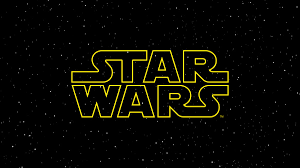

In [9]:
## each item starts with:
## <div class="isv-r PNCib ViTmJb BUooTd"

BS_items = BS.findAll('div', attrs = {"class": "isv-r PNCib ViTmJb BUooTd"})
print(len(BS_items))
BS_items[0]

[<img alt="Star Wars | Wookieepedia | Fandom" class="rg_i Q4LuWd" data-atf="true" data-deferred="1" data-iml="908.6999999880791" height="169" jsname="Q4LuWd" src="" width="300"/>, <img alt="" class="no69gc" data-atf="true" data-deferred="1" data-iml="913.8999999761581" data-sz="16" jsaction="error:trigger.Ci0Ntd" jsname="i1Vy9" src=""/>]
Star Wars | Wookieepedia | Fandom
[<a aria-label="Wookieepedia - FandomStar Wars | Wookieepedia | Fandom" class="iGVLpd kGQAp BqKtob lNHeqe" data-ved="2ahUKEwiDqt6OqfuDAxVjl_0HHdLUArUQr4kDegQIARBy" href="https://starwars.fandom.com/wiki/Star_Wars" jsaction="focus:trigger.HTIQtd;mousedown:trigger.HTIQtd;touchstart:trigger.HTIQtd;" jsname="uy6ald" rel="noopener" target="_blank" title="Star Wars | Wookieepedia | Fandom"><div aria-hidden="true" class="mEQved GdCiyb aEY0r"><img alt="" class="no69gc" data-atf="true" data-deferred="1" data-iml="913.8999999761581" data-sz="16" jsaction="error:trigger.Ci0Ntd" jsname="i1Vy9" src=""/><div aria-hidden="true" class
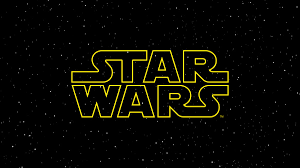
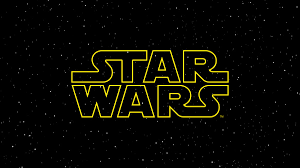
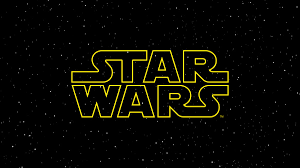

In [14]:
## Examples: take the title, hyperlink and image data
## Some images were in base64, some were urls. You can edit the BS_items[?] to check different items.

## <h3 class="bytUYc">Title</h3>
print(BS_items[0].findAll('img', attrs = {"alt": True}))
print(BS_items[0].findAll('img', attrs = {"alt": True})[0].get('alt'))

## <a aria-label=..., href="Link"}
print(BS_items[0].findAll('a', attrs={"href": True}))
print(BS_items[0].findAll('a', attrs={"href": True})[0].get('href'))

## <img alt=..., src="image data"}
print(BS_items[0].findAll('img', attrs={"src": True}))
print(BS_items[0].findAll('img', attrs={"src": True})[0].get('src'))


## <h3 class="bytUYc">Title</h3>
print(BS_items[47].findAll('img', attrs = {"alt": True}))
print(BS_items[47].findAll('img', attrs = {"alt": True})[0].get('alt'))

## <a aria-label=..., href="Link"}
print(BS_items[47].findAll('a', attrs={"href": True}))
print(BS_items[47].findAll('a', attrs={"href": True})[0].get('href'))

## <img alt=..., src="image data"}
print(BS_items[47].findAll('img', attrs={"src": True}))
print(BS_items[47].findAll('img', attrs={"src": True})[0].get('src'))

In [17]:
## save image from base64

img_data_raw = BS_items[0].findAll('img', attrs={"src": True})[0].get('src')

img_data = img_data_raw.split(',')[-1].strip()
fh = open("example_1.png", "wb")
fh.write(base64.decodebytes(img_data.encode()))

## save image from url
img_data_raw = BS_items[47].findAll('img', attrs={"src": True})[0].get('src')

r = requests.get(img_data_raw, allow_redirects=True)
open("example_2.png", 'wb').write(r.content)

12606

In [16]:
## Save all the items in to pngs, and save a text file that record the file name, the title, and the hyperlink of the image

BS_items = BS.findAll('div', attrs = {"class": "isv-r PNCib ViTmJb BUooTd"})

img_file = open('result/Image Links.txt', 'w')
for item in BS_items:
    
    img_title = item.findAll('h3', attrs = {"class": "bytUYc"})[0].string
    img_link = item.findAll('a', attrs={"href": True})[0].get('href')
    img_data_raw = item.findAll('img', attrs={"src": True})[0].get('src')

    
    img_name = 'result/%s.png'%(
        re.sub('[\_]{2,}', '_', re.sub('[^A-Za-z0–9]', '_', img_title))[:100] ## sometime when the name is too long or have weird symbol, might fail
        )

    print('Saving %s'%(img_name))
    if 'data:image' in img_data_raw:
        img_date = img_data_raw.split(',')[-1].strip()
        fh = open(img_name, "wb")
        fh.write(base64.decodebytes(img_data.encode()))
    else:
        r = requests.get(img_data_raw, allow_redirects=True)
        open(img_name, 'wb').write(r.content)
    img_file.write(','.join([img_name, img_title, img_link]) + '\n')
    
img_file.close()

Saving result/Star_Wars_Wookieepedia_Fandom.png
Saving result/Would_you_be_up_to_a_Star_Wars_reboot_r_StarWars.png
Saving result/Star_Wars_The_Force_Awakens_Theatrical_Poster_First_Look_In_theater_Exclusives_and_More_StarWars_com.png
Saving result/Star_Wars_Movies_StarWars_com.png
Saving result/Star_Wars_Episode_VII_The_Force_Awakens_0_IMDb.png
Saving result/Our_Favorite_Star_Wars_Memories_StarWars_com.png
Saving result/Best_Star_Wars_Characters_Iconic_Star_Wars_Characters.png
Saving result/How_Star_Wars_redefined_the_notion_of_what_a_movie_could_be_Vox.png
Saving result/Star_Wars_Movies_Head_To_Disney_Linear_Networks_Shared_With_Turner_–_Deadline.png
Saving result/Star_Wars_Character_Encyclopedia_Updated_and_Expanded_Edition_Amazon_co_uk_Beecroft_Simon_Hidalgo_Pa.png
Saving result/If_Star_Wars_were_to_crossover_with_any_other_media_franchise_which_would_it_be_r_StarWars.png
Saving result/Star_Wars_Wookieepedia_Fandom.png
Saving result/Star_Wars_Galaxy_of_Heroes_–_Apps_on_Google_Play.p